(1010,) (1010, 2)
19.939556435643567 3.1218831844116215


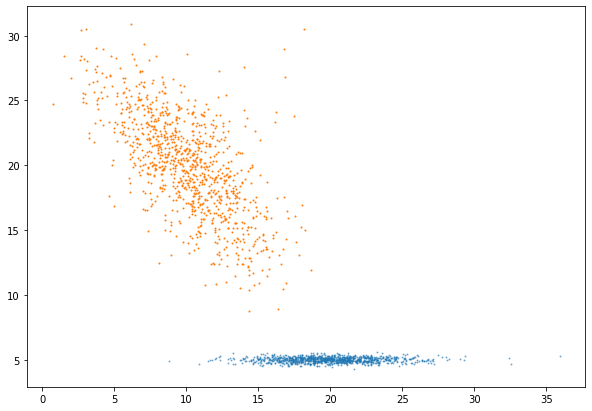

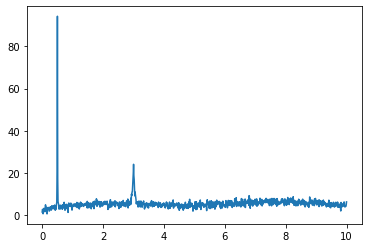

In [32]:
import numpy as np
import matplotlib.pyplot as plt
d1=np.loadtxt("outlier_1d.txt")
d2=np.loadtxt("outlier_2d.txt")
d3=np.loadtxt("outlier_curve.txt")
print(np.shape(d1),np.shape(d2))

print(np.mean(d1),np.std(d1))
plt.figure(figsize=(10,7))
plt.scatter(d1, np.random.normal(5, 0.2, size=d1.size), s=1, alpha=0.5)
plt.scatter(d2[:,0],d2[:,1],s=1)
plt.show()
plt.plot(d3[:,0],d3[:,1])


In [33]:
d2.shape


(1010, 2)

In [34]:
from scipy.stats import norm
mean,std=np.mean(d1),np.std(d1)
Z=np.abs((d1-mean)/std)
threshold=3
good=Z<threshold

print("Total number of bad points/outliers is: ",(~good).sum())

print(f"z-score of 3 corresponds to a prob of {100*2*norm.sf(threshold):0.2f}%")

Total number of bad points/outliers is:  5
z-score of 3 corresponds to a prob of 0.27%


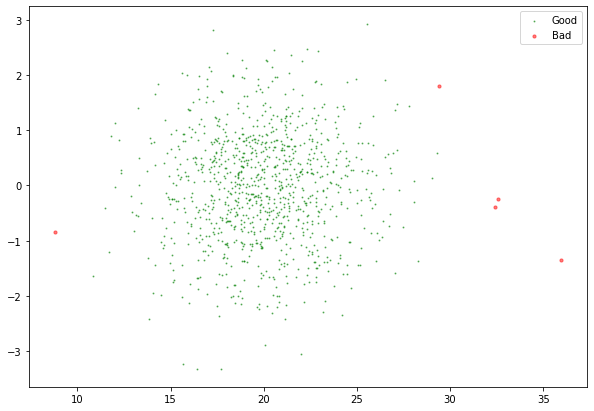

In [35]:
plt.figure(figsize=(10,7))
visual_scatter=np.random.normal(size=d1.size)
plt.scatter(d1[good],visual_scatter[good],s=1,alpha=0.5,color='green',label='Good')
plt.scatter(d1[~good],visual_scatter[~good],s=10,alpha=0.5,color='red',label='Bad')
plt.legend(loc=1)

Number of outliers:8


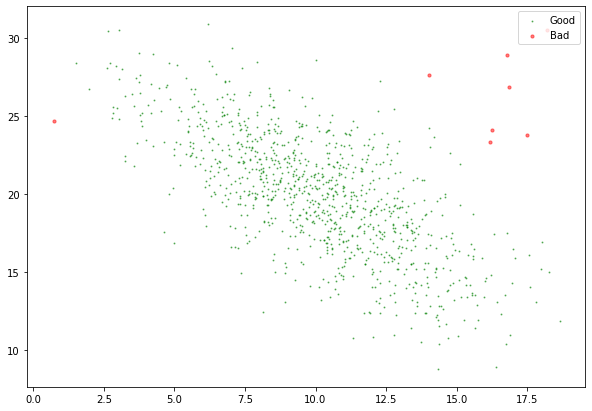

In [36]:
from scipy.stats import multivariate_normal as mn
mean, cov= np.mean(d2,axis=0), np.cov(d2.T)
good=mn(mean,cov).pdf(d2)>0.01/100
print(f"Number of outliers:{(~good).sum()}")
plt.figure(figsize=(10,7))
plt.scatter(d2[good,0],d2[good,1],s=1,alpha=0.5,label='Good',color='g')
plt.scatter(d2[~good,0],d2[~good,1],s=10,alpha=0.5,label='Bad',color='r')
plt.legend(loc=1)

# Visualising Polynomial data/ equation

    1.Build a polynomial equation of whatever degree you seem fit
    2.Set a defination for outliers. generally 3 std
    3.plot the xs and ys and the polynomial equation(fit).
    4.keep removing the outliers and see you you fit changes

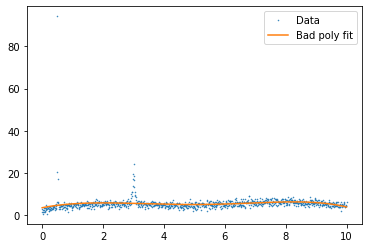

In [37]:
xs, ys = d3.T
p = np.polyfit(xs, ys,deg=5)
ps = np.polyval(p, xs)
plt.plot(xs, ys, ".", label="Data", ms=1)
plt.plot(xs, ps, label="Bad poly fit")
plt.legend();

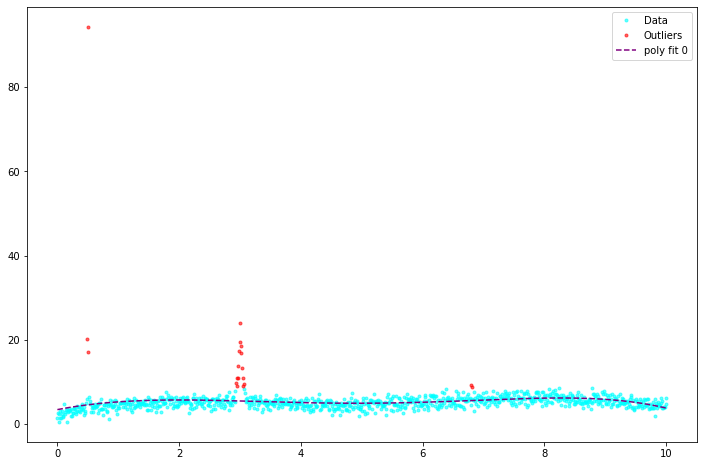

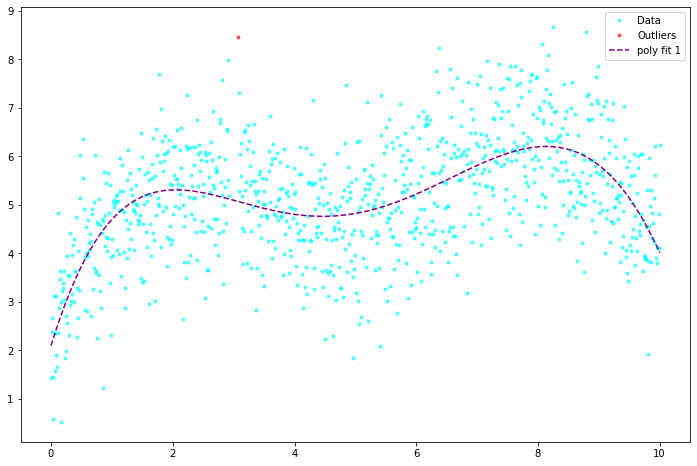

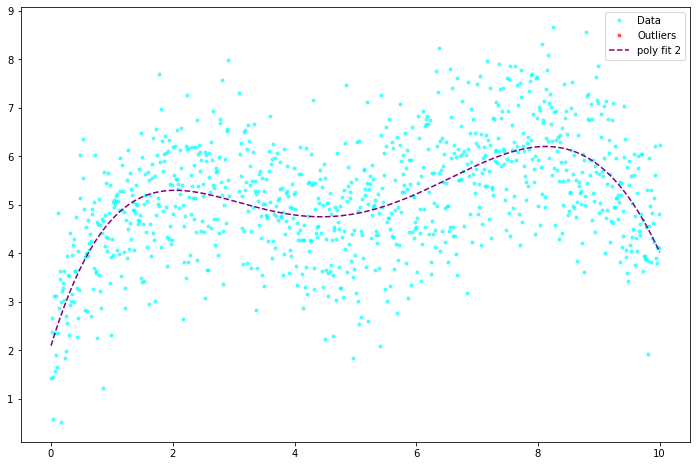

In [48]:
x,y=xs.copy(),ys.copy()
for i in range(5):
    p=np.polyfit(x,y,deg=5)
    ps=np.polyval(p,x)
    good=y-ps<3
    x_bad,y_bad=x[~good],y[~good]
    x,y=x[good],y[good]
    plt.figure(figsize=(12,8))
    plt.plot(x,y,".",label="Data",color='cyan',alpha=0.6)
    plt.plot(x_bad,y_bad,".",label="Outliers",color='red',alpha=0.6)
    plt.plot(x,np.polyval(p,x),label="poly fit "+str(i),color='purple',ls="--")
    plt.legend()
    plt.show()
    
    if((~good).sum()==0):
        break
    

# Automating outliers finding using Scikit
    Can be tune by changing the contamination

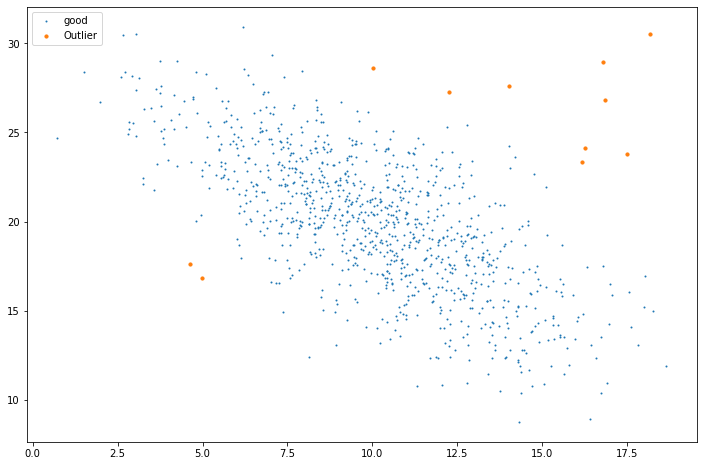

In [50]:


from sklearn.neighbors import LocalOutlierFactor

lof=LocalOutlierFactor(n_neighbors=20,contamination=0.01)
good=lof.fit_predict(d2)==1
plt.figure(figsize=(12,8))
plt.scatter(d2[good,0],d2[good,1],label="good",s=1)
plt.scatter(d2[~good,0],d2[~good,1],label="Outlier",s=10)
plt.legend()
plt.show()